<a href="https://colab.research.google.com/github/Gaurav-phatkare/Time-Series-Analysis/blob/main/TimeSeries_Analysis_and_Forecasting_Using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis And Forecasting
Using Deep Learning And Tensorflow Library

**BitPredict**

Types of Time series analysis
1. Classification : anomaly or not/Discrate
2. Forecasting : what price will be at particular day/Continuous


###the predictability of an event or a quantity depends on several factors including:
1. how well we understand the factors that contribute to it
2. how much data is available
3. how similar the future is to the past
4. whether the forecasts can affect the thing we are trying to forecast

---

What will the price of Bitcoin be tomorrow?

input size  = [None, 30]
output size  = Horizon

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-11-03 11:18:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2023-11-03 11:18:47 (49.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ['Date'],
                 index_col = ['Date'])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# how many samples do we have?
df.shape

(2787, 5)

In [5]:
#Only want closing for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price of Bitcoin from 1 Oct 2013 to 18 may 2021')

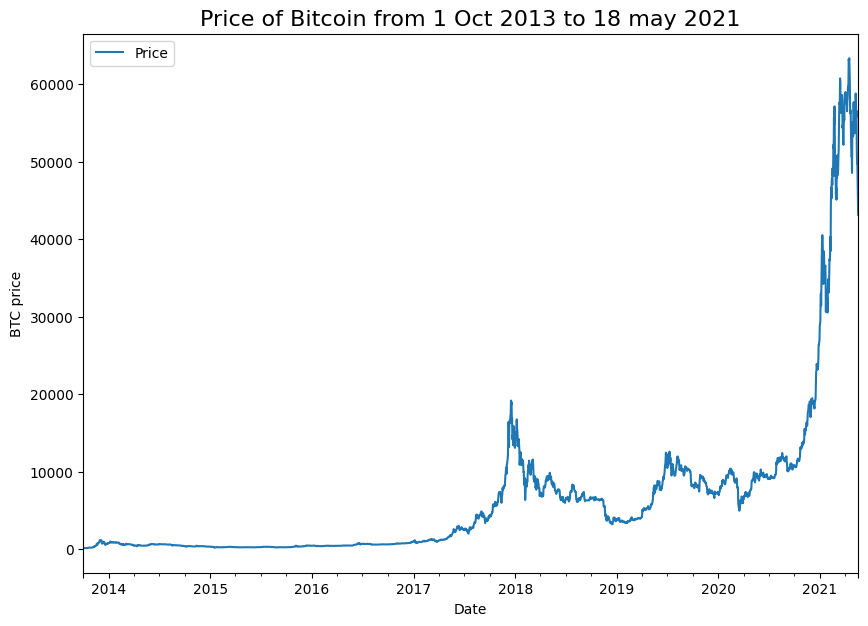

In [6]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize = (10, 7))
plt.ylabel("BTC price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 may 2021", fontsize =16)


## Read Data using CSV module

In [7]:
# importing and formating istorical bittcoin data withh python

import csv
from datetime import datetime

timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader)

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

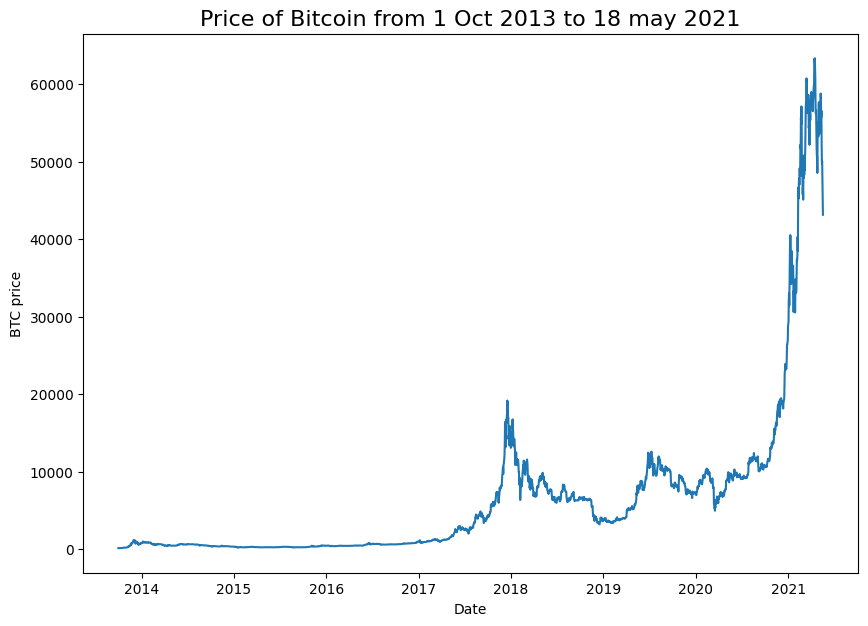

In [8]:
# Plot from csv
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (10,7))
plt.plot(timesteps, btc_price)

plt.ylabel("BTC price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 may 2021", fontsize =16)
plt.xlabel("Date")

##Format Data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data(the wrong way)

In [9]:
bitcoin_prices[:10]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866
2013-10-06,120.65533
2013-10-07,121.79500
2013-10-08,123.03300
2013-10-09,124.04900


In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size = 0.2,
                                                    random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

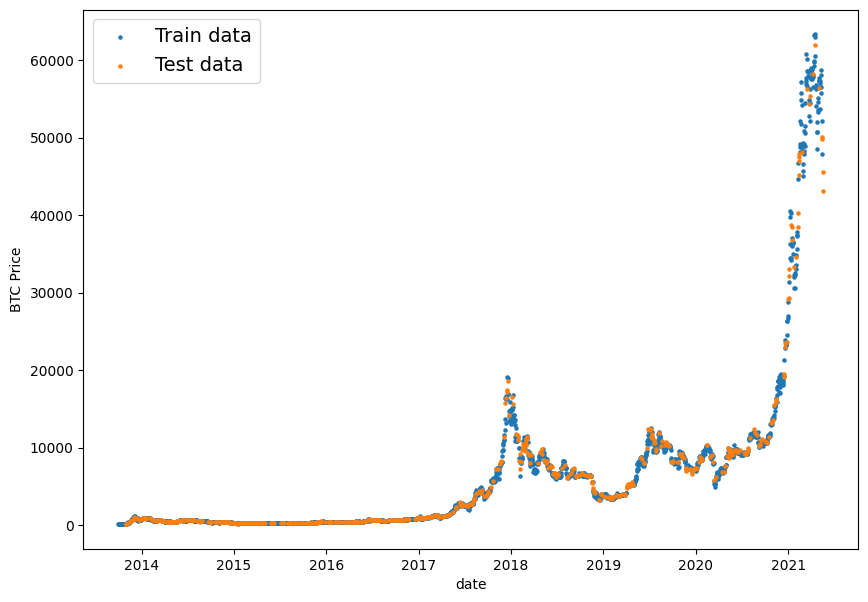

In [13]:
# let plot above split
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = "Train data")
plt.scatter(X_test, y_test, s = 5, label = 'Test data')
plt.xlabel("date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show()

##Create train test split in right way

In [14]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

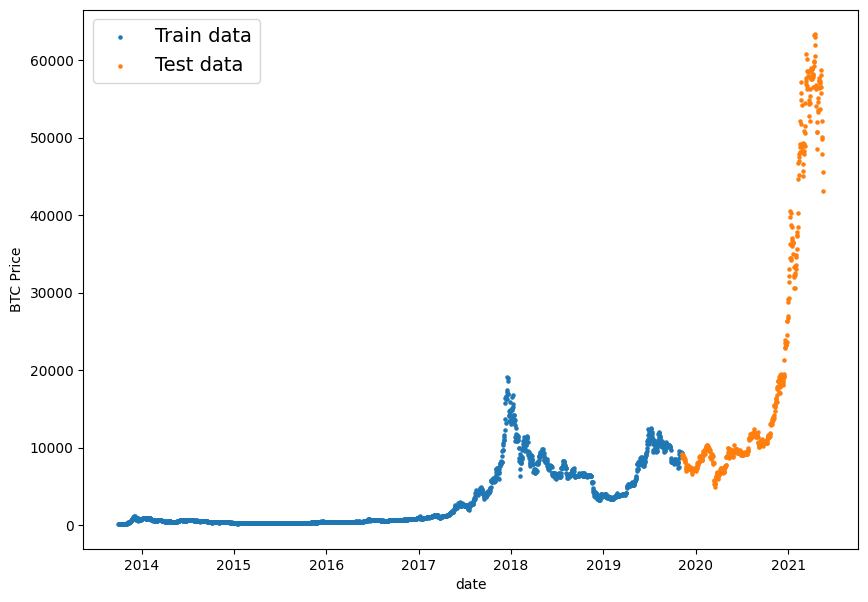

In [15]:
#plot above split
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = "Train data")
plt.scatter(X_test, y_test, s = 5, label = 'Test data')
plt.xlabel("date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show()

## Create a plotting function


In [16]:
def plot_time_series_data(timesteps, values, format = ".", start = 0, end = None, label = None):
  plt.plot(timesteps[start:end], values[start:end], format, label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)


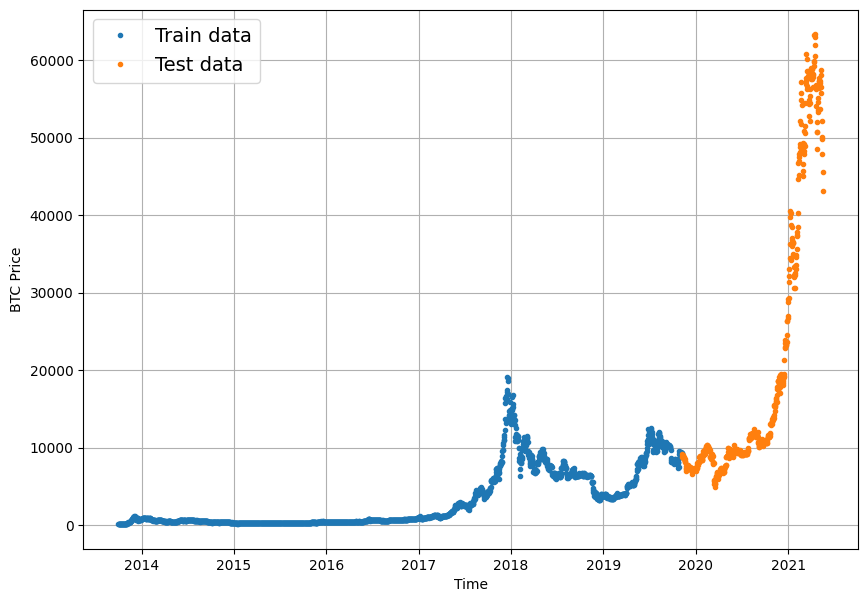

In [17]:
# test above function
plt.figure(figsize=(10,7))
plot_time_series_data(timesteps = X_train, values = y_train, label = 'Train data')
plot_time_series_data(timesteps = X_test,values = y_test,label = 'Test data')

## Experiments we are performing

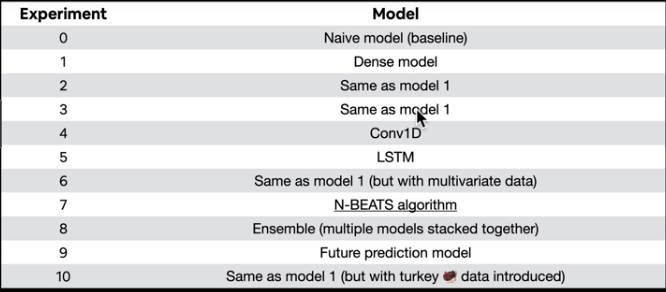

**Horizon**: number o timesteps into the future we re going to predict

**Window Size** : number of timesteps we are going to used to predict horizon

# Model 0 : Naive approach Baseline Model

$$\hat{y}_{t} = y_{t-1}$$

The prediction at timestep t (y-hat) is equal to the value at timestep t-1(previous timestep) this is for a horizon of 1

In [18]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [19]:
#Model Building

naive_forecast = y_test[:-1]


naive_forecast[:5], naive_forecast[-5:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917]),
 array([52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361]))

In [20]:
y_test[:5]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917])

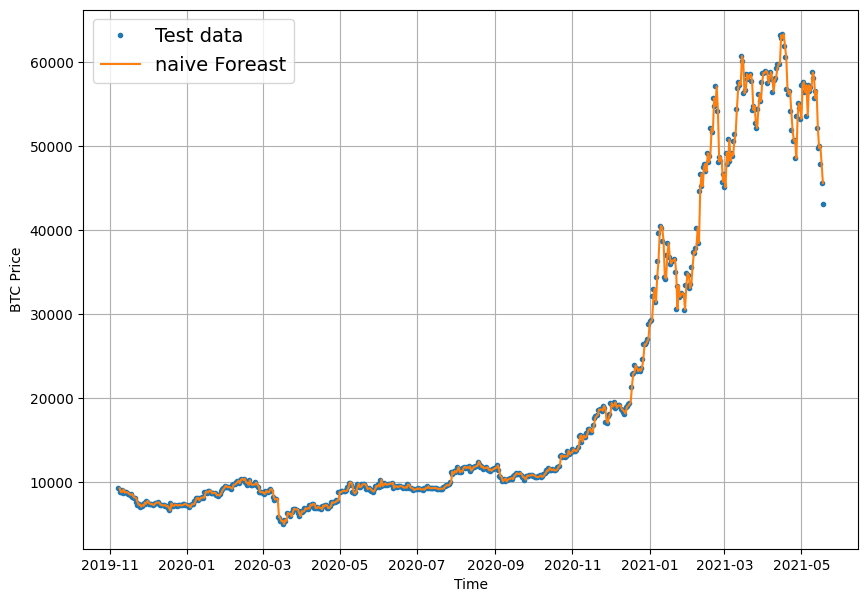

In [21]:
# plot naie forecast

plt.figure(figsize = (10,7))
# plot_time_series_data(timesteps = X_train, values = y_train, label = 'Train data')
plot_time_series_data(timesteps = X_test, values = y_test, label = 'Test data')
plot_time_series_data(timesteps = X_test[1:], values = naive_forecast, format = "-", label = "naive Foreast")

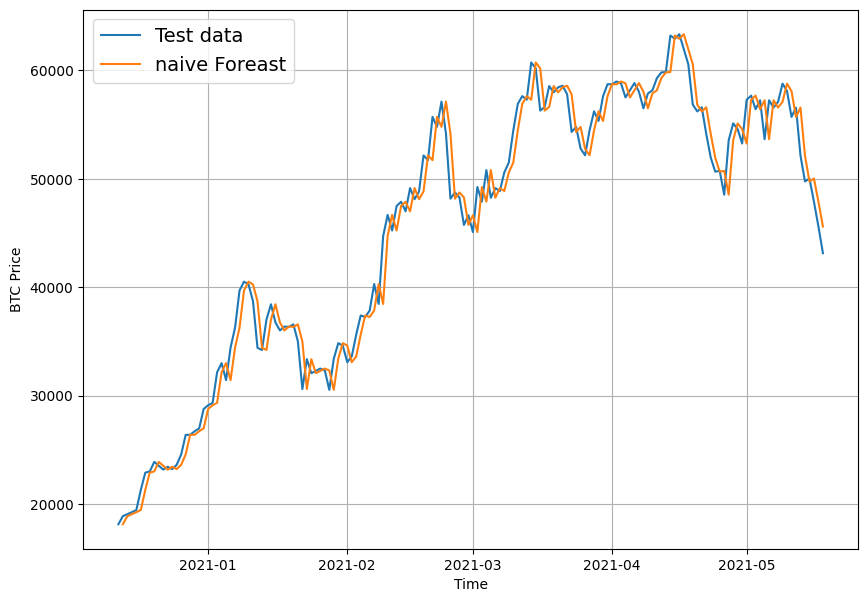

In [22]:
# plot naie forecast

plt.figure(figsize = (10,7))
# plot_time_series_data(timesteps = X_train, values = y_train, label = 'Train data')
plot_time_series_data(timesteps = X_test, values = y_test,start = 400, format = "-" ,label = 'Test data')
plot_time_series_data(timesteps = X_test[1:], values = naive_forecast, start = 400,format = "-", label = "naive Foreast")

## Evaluation metrix for time series model


well it is regression model
* MAE
* MSE
* RMSE
* MAPE
* MASE



In [23]:
import tensorflow as tf

def MASE(y_true, y_pred):
  """
  Implement MASE(assumming no seasonality of data)
  """

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # find MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

In [24]:
MASE(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [25]:
# y_test[1:], y_test[:-1]

In [26]:
def evaluate_pred_result(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rsme = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = MASE(y_true, y_pred)

  return {
      "mae" : mae.numpy(),
      "mse" : mse.numpy(),
      "rsme" : rsme.numpy(),
      "mase" : mase.numpy(),
      "mape" : mape.numpy()
  }

In [27]:
naive_result = evaluate_pred_result(y_test[1:], naive_forecast)

In [28]:
naive_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rsme': 1071.2362,
 'mase': 0.99957,
 'mape': 2.516525}

# Formatting data part 2: Windowing our dataset

window
```

* [1,2,3,4,5,6,7] -> [8]
* [2,3,4,5,6,7,8] -> [9]
```

In [29]:
len(y_train)

2229

In [30]:
btc_price[:7], btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [31]:
# global variables for window and horizon size
HORIZON = 1
WINDOW_SIZE = 7


In [32]:
def get_labelled_window(x, horizon = HORIZON):
  """
  Creates labels for windowed dataset
  Eg ig horizon = 1
  Input = [0,1,2,3,4,5,6,7,8] --> Output:([0,1,2,3,4,5,6,7],[8])
  """
  return x[:, :-horizon],x[:, -horizon:]

In [33]:
# test out above the window labelling function

test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis = 0))

In [34]:
test_window , test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [35]:
type(btc_price)

list

In [36]:
import numpy as np
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):

  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis = 0).T

  # print(f"Window indexes :\n {window_indexes, window_indexes.shape}")

  windowed_arr = x[window_indexes]

  windows, labels = get_labelled_window(windowed_arr, horizon = horizon)
  return windows, labels

In [37]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [38]:
#first three windows and labels
for i in range(4):
  print(f"Window : {full_windows[i]}  -->  Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]  -->  Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]  -->  Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]  -->  Label : [125.96116]
Window : [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116]  -->  Label : [125.27966]


In [39]:
#Last three windows and labels
for i in range(4):
  print(f"Window : {full_windows[i-3]}  -->  Label : {full_labels[i-3]}")

Window : [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]  -->  Label : [47885.62525472]
Window : [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]  -->  Label : [45604.61575361]
Window : [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]  -->  Label : [43144.47129086]
Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]  -->  Label : [123.033]


## Splitting into train and test

In [40]:
def make_train_test_splits(windows, labels,test_split = 0.2):
  splits_size = int(len(windows) * (1-test_split))
  train_windows = windows[:splits_size]
  train_labels  = labels[:splits_size]

  test_windows = windows[splits_size:]
  test_labels = labels[splits_size:]

  return train_windows, test_windows, train_labels, test_labels

In [41]:
# create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

## modelling Checkpoint Callback

In [42]:
import os

# create a function to implement a modelcheckpoint call with a specific filename
def create_model_checkpoint(model_name, save_path = 'model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,model_name),

                                                                    verbose = 0,
                                                                    save_best_only = True)

# Model 1 : Dense Model (window = 7, horizon = 1)

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON, activation ="linear" )
], name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])


model_1_history = model_1.fit(x=train_windows,
                              y=train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = 128,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - 9s 95ms/step - loss: 2016.4690 - mae: 2016.4690 - mse: 11270456.0000 - val_loss: 3655.1191 - val_mae: 3655.1191 - val_mse: 26238262.0000
Epoch 2/100
18/18 [==============================] - 1s 56ms/step - loss: 330.5988 - mae: 330.5988 - mse: 409872.2188 - val_loss: 1047.7545 - val_mae: 1047.7545 - val_mse: 3681065.5000
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 207.6805 - mae: 207.6805 - mse: 208361.5312 - val_loss: 1049.0890 - val_mae: 1049.0890 - val_mse: 3683725.7500
Epoch 4/100
18/18 [==============================] - 1s 50ms/step - loss: 189.7423 - mae: 189.7423 - mse: 184196.8906 - val_loss: 1014.8205 - val_mae: 1014.8205 - val_mse: 3464231.5000
Epoch 5/100
18/18 [==============================] - 1s 47ms/step - loss: 179.0272 - mae: 179.0272 - mse: 165649.8438 - val_loss: 971.9773 - val_mae: 971.9773 - val_mse: 3166071.2500
Epoch 6/100
18/18 [==============================] - 1s 54ms/step - loss:

In [44]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 663.8570 - mae: 663.8570 - mse: 1364424.6250


[663.8569946289062, 663.8569946289062, 1364424.625]

In [45]:
# [989.0361938476562, 989.0361938476562, 3559146.0
# [670.2048950195312, 670.2048950195312, 1605891.625]

In [46]:
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 562.8683 - mae: 562.8683 - mse: 1153211.7500


[562.8682861328125, 562.8682861328125, 1153211.75]

## model prediction function


In [47]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [48]:
model_1_preds = make_preds(model_1, test_windows)

18/18 [==============================] - 0s 2ms/step


In [49]:
len(model_1_preds), model_1_preds[:10]

(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8847.479 , 8771.278 , 9015.0205, 8763.769 , 8739.555 , 8732.435 ,
        8664.878 , 8518.778 , 8451.697 , 8515.928 ], dtype=float32)>)

In [50]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [51]:
# Evaluate preds
model_1_result = evaluate_pred_result(tf.squeeze(test_labels),
                                     model_1_preds)

In [52]:
naive_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rsme': 1071.2362,
 'mase': 0.99957,
 'mape': 2.516525}

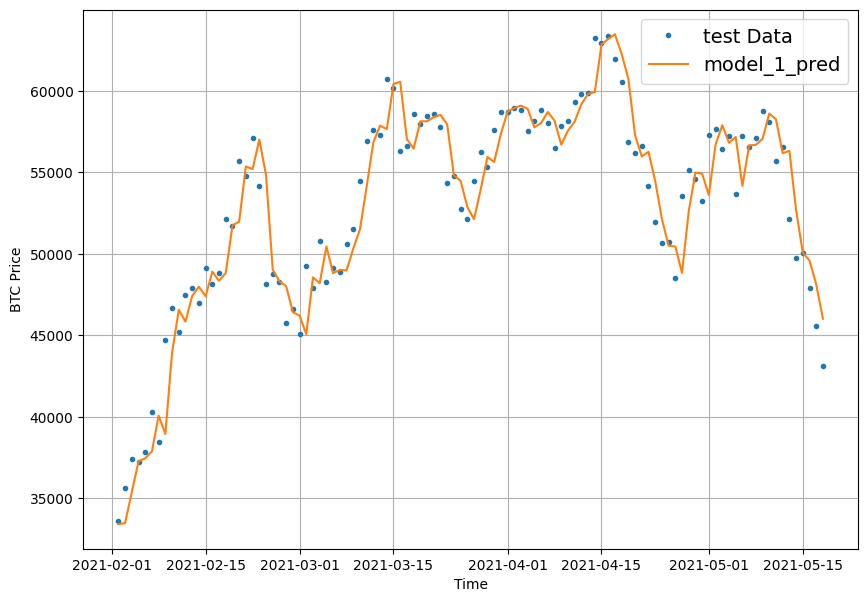

In [53]:
offset = 450


plt.figure(figsize = (10,7))

plot_time_series_data(timesteps = X_test[-len(test_windows):],
                      values = test_labels[:, 0],
                      start = offset,
                      label = "test Data")

plot_time_series_data(timesteps = X_test[-len(test_windows):],
                      values = model_1_preds,
                      start = offset,
                      format = "-",
                      label = "model_1_pred")


# Model 2 : Dense Model (window = 30, horizon = 1)

In [54]:
HORIZON = 1
WINDOW_SIZE = 30


In [55]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

In [56]:
len(full_windows), len(full_labels)

(2757, 2757)

In [57]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows = full_windows,
    labels = full_labels,
    test_split = 0.2
)

In [58]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [59]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_2_Dense")



model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

history_model_2 = model_2.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              batch_size = 128,
                              verbose = 1,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 31ms/step - loss: 496.9689 - val_loss: 1918.9089
Epoch 2/100
18/18 [==============================] - 0s 23ms/step - loss: 319.5808 - val_loss: 1382.2549
Epoch 3/100
18/18 [==============================] - 0s 22ms/step - loss: 239.4988 - val_loss: 1232.8225
Epoch 4/100
18/18 [==============================] - 0s 22ms/step - loss: 217.0502 - val_loss: 1182.2345
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 219.1573 - val_loss: 1253.9396
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 220.0863 - val_loss: 1441.0885
Epoch 7/100
18/18 [==============================] - 0s 21ms/step - loss: 212.9505 - val_loss: 1073.5222
Epoch 8/100
18/18 [==============================] - 0s 23ms/step - loss: 181.1675 - val_loss: 1032.2715
Epoch 9/100
18/18 [==============================] - 0s 23ms/step - loss: 177.1429 - val_loss: 980.6146
Epoch 10/100
18/18 [==============================] - 0s 4

In [60]:
# evaluate model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 801.7582


801.7581787109375

In [61]:
# load in best performance model

model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_Dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 600.2566


600.256591796875

In [62]:
# forecast predictions

model_2_preds = make_preds(model_2,
                           test_windows)


18/18 [==============================] - 0s 2ms/step


In [63]:
model_2_results = evaluate_pred_result(tf.squeeze(test_labels),
                                 model_2_preds)

model_2_results

{'mae': 600.25653,
 'mse': 1231106.1,
 'rsme': 1109.5521,
 'mase': 1.0492543,
 'mape': 2.700796}

In [64]:
model_1_result

{'mae': 562.8683,
 'mse': 1153211.8,
 'rsme': 1073.877,
 'mase': 0.9888037,
 'mape': 2.527887}

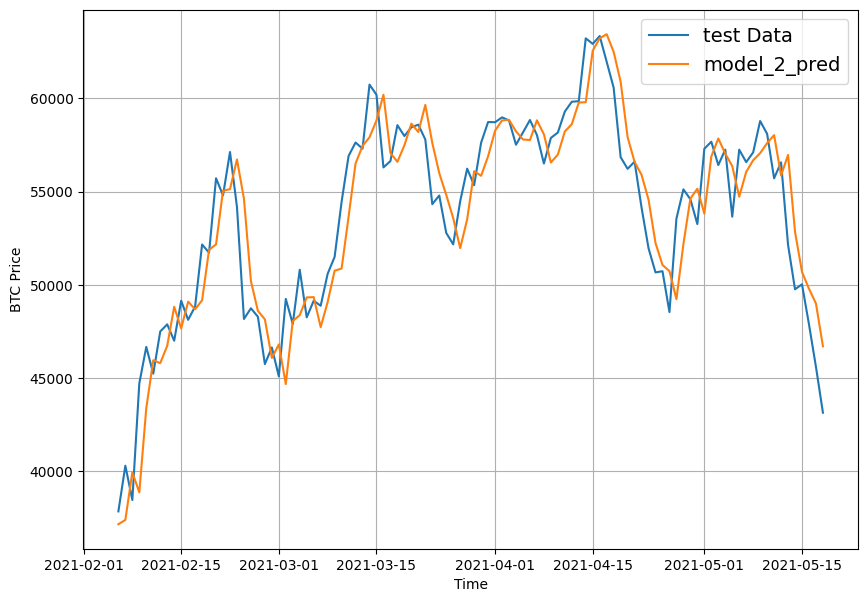

In [65]:
offset = 450


plt.figure(figsize = (10,7))

plot_time_series_data(timesteps = X_test[-len(test_windows):],
                      values = test_labels[:, 0],
                      start = offset,
                      format = "-",
                      label = "test Data")

plot_time_series_data(timesteps = X_test[-len(test_windows):],
                      values = model_2_preds,
                      start = offset,
                      format = "-",
                      label = "model_2_pred")

# Model 3 : Dense Model (window = 30, horizon = 7)

In [66]:
HORIZON = 7
WINDOW_SIZE = 30


full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [67]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows = full_windows,
    labels = full_labels,
    test_split = 0.2
)

In [68]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [69]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
],name = 'model_3_dense')


model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

history_model_3 = model_3.fit(train_windows,
                    train_labels,
                    batch_size = 128,
                    epochs = 100,
                    verbose  = 1,
                    validation_data = (test_windows, test_labels),
                    callbacks = [create_model_checkpoint(model_name=model_3.name)])


Epoch 1/100
18/18 [==============================] - 2s 41ms/step - loss: 2076.7124 - val_loss: 2977.5811
Epoch 2/100
18/18 [==============================] - 0s 22ms/step - loss: 571.3083 - val_loss: 2923.0635
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 437.2538 - val_loss: 2335.9697
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 386.9985 - val_loss: 1959.3571
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 351.0188 - val_loss: 1998.5619
Epoch 6/100
18/18 [==============================] - 0s 24ms/step - loss: 331.9918 - val_loss: 1752.4646
Epoch 7/100
18/18 [==============================] - 0s 23ms/step - loss: 310.5652 - val_loss: 1591.0482
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 302.6979 - val_loss: 1606.5891
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 292.9296 - val_loss: 1704.5182
Epoch 10/100
18/18 [==============================] - 0s 

In [70]:
# Evaluate
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1388.1437


1388.1436767578125

In [71]:
model_3 = tf.keras.models.load_model('/content/model_experiments/model_3_dense')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1249.0988


1249.0987548828125

In [72]:
# forecast predictions

model_3_preds = make_preds(model_3,
                           test_windows)


18/18 [==============================] - 0s 2ms/step


In [ ]:
model_3_results = evaluate_pred_result(tf.squeeze(test_labels),
                                 model_3_preds)

model_3_results

In [74]:
model_3_preds.shape,model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [75]:
def evaluate_pred_result(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rsme = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = MASE(y_true, y_pred)



  # account for different sized metrics
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rsme = tf.reduce_mean(rsme)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  return {
      "mae" : mae.numpy(),
      "mse" : mse.numpy(),
      "rsme" : rsme.numpy(),
      "mase" : mase.numpy(),
      "mape" : mape.numpy()
  }

In [76]:
model_3_results = evaluate_pred_result(tf.squeeze(test_labels),
                                       model_3_preds)

In [77]:
model_3_results

{'mae': 1249.0988,
 'mse': 5491447.0,
 'rsme': 1438.2299,
 'mase': 2.2227013,
 'mape': 5.5146923}

In [78]:
# t = [[1,2],[2,3],[4,5],[6,7],[2,3]]
# p = [[2,3],[5,6],[6,7],[3,4],[5,6]]

# tf.keras.metrics.mean_absolute_error(t, p)

In [79]:
# tf.reduce_mean([1, 3, 2, 3, 3])

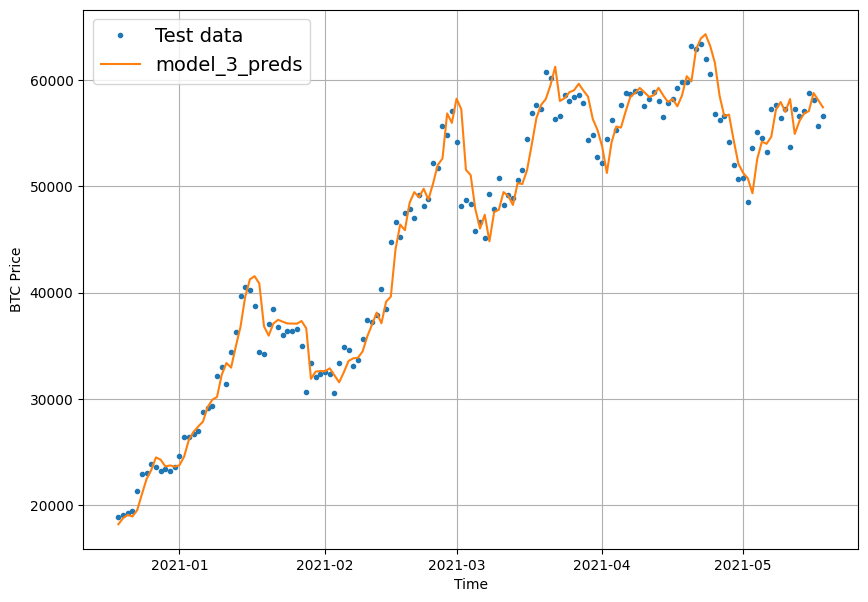

In [80]:
offset = 400
plt.figure(figsize = (10, 7))
plot_time_series_data(timesteps=X_test[-len(test_windows):], values = test_labels[:, 0], start = offset, label = 'Test data')
plot_time_series_data(timesteps = X_test[-len(test_windows):],format = "-", values = model_3_preds[:,0], start =offset, label = 'model_3_preds' )

In [81]:
test_labels[0]


array([8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
       8760.89271814, 8749.52059102, 8656.97092235])

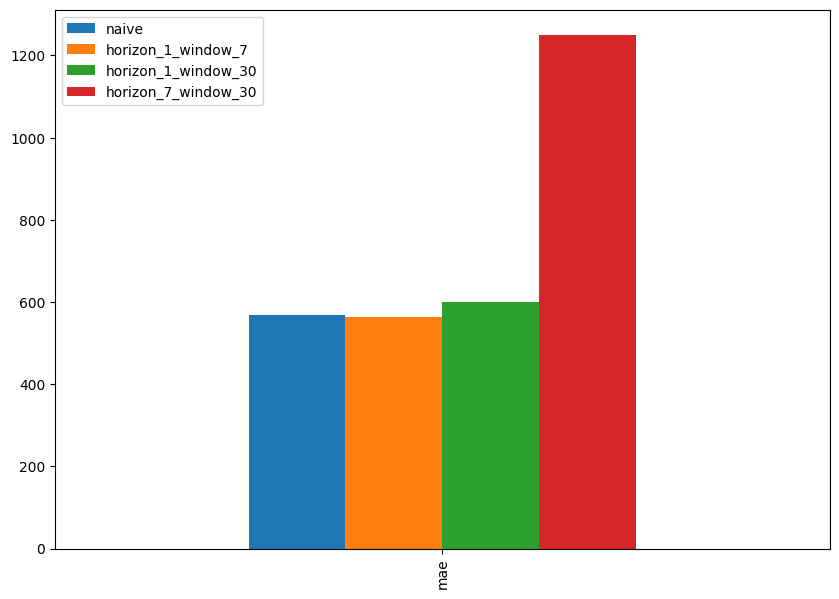

In [82]:
pd.DataFrame({"naive": naive_result["mae"],
              "horizon_1_window_7": model_1_result["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

# Model 4 : Conv1D

In [85]:
HORIZON = 1
WINDOW_SIZE = 7

# Create windowed dataset

full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [86]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows),len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [87]:
# Check data input shape
train_windows[0].shape

(7,)

to use conv1D layer, we need an input shape of :(batch size, timesteps, input_dim)

In [97]:
x = tf.constant(train_windows[0])
print(x)
y = tf.expand_dims(x, axis=1)
print(y)

tf.Tensor([123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ], shape=(7,), dtype=float64)
tf.Tensor(
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]], shape=(7, 1), dtype=float64)


In [90]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))

In [91]:
expand_dims_layer

In [99]:
print(f"Original Shape : {x.shape}")
print(f"Expanded Shape : {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original Shape : (7,)
Expanded Shape : (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [106]:
# model buidling
tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    layers.Conv1D(filters = 128,kernel_size = 5, strides = 1, padding = "causal", activation = "relu" ),
    layers.Dense(HORIZON)
], name = "model_4_conv1D")

model_4.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())


history_model_4 = model_4.fit(
    train_windows,
    train_labels,
    batch_size = 128,
    epochs = 100,
    verbose = 1,
    validation_data = (test_windows, test_labels),
    callbacks = [create_model_checkpoint(model_name = model_4.name)]
)

Epoch 1/100
18/18 [==============================] - 1s 44ms/step - loss: 2074.3845 - val_loss: 3831.8589
Epoch 2/100
18/18 [==============================] - 1s 32ms/step - loss: 337.0405 - val_loss: 1063.4105
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 215.1308 - val_loss: 1068.6395
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 192.9688 - val_loss: 1051.3010
Epoch 5/100
18/18 [==============================] - 1s 30ms/step - loss: 186.9846 - val_loss: 1040.0054
Epoch 6/100
18/18 [==============================] - 1s 31ms/step - loss: 186.0673 - val_loss: 1034.9723
Epoch 7/100
18/18 [==============================] - 1s 32ms/step - loss: 184.2600 - val_loss: 1012.8339
Epoch 8/100
18/18 [==============================] - 1s 32ms/step - loss: 179.4660 - val_loss: 1007.0466
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 177.5429 - val_loss: 1013.6374
Epoch 10/100
18/18 [==============================] - 1s

In [107]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_8 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
# evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 638.1415


638.1415405273438

In [109]:
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.9603


570.9603271484375

In [110]:
# make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8893.796, 8791.331, 8995.826, 8795.969, 8731.525, 8730.623,
       8675.998, 8543.753, 8452.64 , 8516.97 ], dtype=float32)>

In [113]:
model_4_results = evaluate_pred_result(tf.squeeze(test_labels),model_4_preds)

In [114]:
model_4_results


{'mae': 570.9604,
 'mse': 1191736.4,
 'rsme': 1091.6667,
 'mase': 1.0030192,
 'mape': 2.5631611}

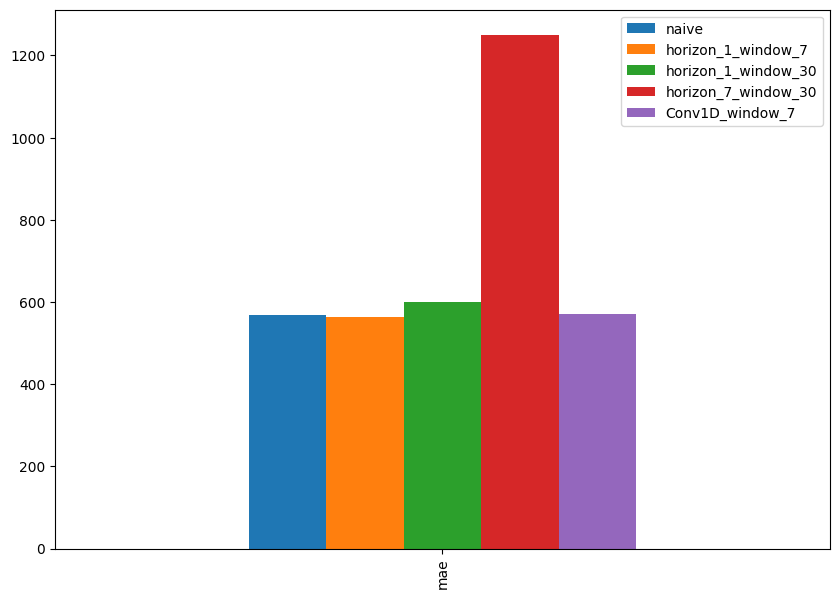

In [115]:
pd.DataFrame({"naive": naive_result["mae"],
              "horizon_1_window_7": model_1_result["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
             "Conv1D_window_7":model_4_results['mae']}, index=["mae"]).plot(figsize=(10, 7), kind="bar");